In [ ]:
import gym
import numpy as np

In [ ]:
env = gym.make('FrozenLake8x8-v0')
Q = np.zeros([env.observation_space.n,env.action_space.n])
# env.obeservation.n, env.action_space.n gives number of states and action in env loaded
# env.reset()
# for _ in range(500):
#     env.render()
#     env.step(env.action_space.sample())
# # 2. To check all env available, uninstalled ones are also shown
# from gym import envs 
# print(envs.registry.all())

In [ ]:
eta = .628
gma = .9
epis = 5000
rev_list = [] 

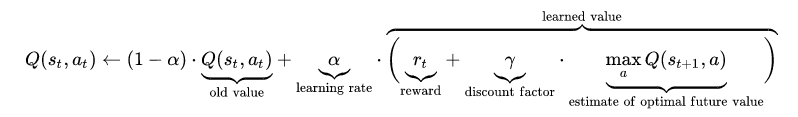

In [ ]:
for i in range(epis):
    # Reset environment
    s = env.reset()
    rAll = 0
    d = False
    j = 0
    #The Q-Table learning algorithm
    while j < 99:
        env.render()
        j+=1
        # Choose action from Q table
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        #Get new state & reward from environment
        s1,r,d,_ = env.step(a)
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] + eta*(r + gma*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    rev_list.append(rAll)
    env.render()
print("Reward Sum on all episodes " + str(sum(rev_list)/epis))
print ("Final Values Q-Table")
print (Q)


In [ ]:
s = env.reset()
d = False
# The Q-Table learning algorithm
while d != True:
    env.render()
    # Choose action from Q table
    a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
    #Get new state & reward from environment
    s1,r,d,_ = env.step(a)
    #Update Q-Table with new knowledge
    Q[s,a] = Q[s,a] + eta*(r + gma*np.max(Q[s1,:]) - Q[s,a])
    s = s1
# Code will stop at d == True, and render one state before it